# Projet Numérique Paul Delbouve, Hugo Terrasson

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#On a la méthode d'Euler
def solve_euler_explicit(f,x0,dt):
    liste_t=np.array([i*dt for i in range (10000)])
    tab=np.zeros([len(x0),len(liste_t)])
    tab[:,0]=x0
    for i in range(1,len(liste_t)):
        tab[:,i]=tab[:,i-1]+dt*f(tab[:,i-1],liste_t[i])
    return tab

#Méthode de Runge-Kunta d'ordre 2
def solve_rk2(f,x0,dt):
    liste_t=np.array([i*dt for i in range (10000)])
    tab=np.zeros([len(x0),len(liste_t)])
    tab[:,0]=x0
    for i in range(1,len(liste_t)):
        k=f(tab[:,i-1],liste_t[i])
        tab[:,i]=tab[:,i-1]+dt/2*(k+f(tab[:,i-1]+dt*k,liste_t[i]+dt))
    return tab

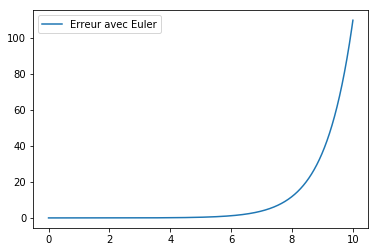

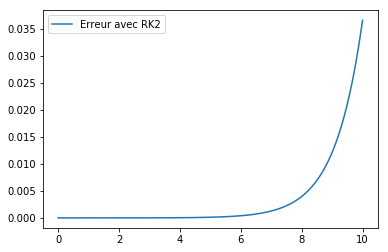

In [3]:
def f1(X,t):
    return np.array(X[0])
def f2(X,t):
    return np.array(-X[0])
#on prend le schéma classique x' = x dont la solution est la fonction exponentielle
lx=np.array([i*0.001 for i in range (10000)])
# on prend 10 000 points sur l'intervalle [0,10]
l1y=solve_euler_explicit(f1,[1],0.001)[0,:] #resolution avec Euler
l2y=solve_rk2(f1,[1],0.001)[0,:] #resolution avec RK2
liste1y=solve_euler_explicit(f2,[1],0.001)[0,:] #resolution avec Euler
liste2y=solve_rk2(f2,[1],0.001)[0,:] #resolution avec RK2

lz=np.exp(lx)
#écart à la fonction exponentielle pour Euler
plt.figure()
plt.plot(lx,np.abs(l1y-lz), label= 'Erreur avec Euler')
plt.legend()
#écart à la fonction exponentielle pour RK2
plt.figure()
plt.plot(lx,np.abs(l2y-lz),label='Erreur avec RK2')
plt.legend()
plt.show()

### Question 2


$$ e^{j+1}= x^{j} + \int_{t_{j}}^{t_{j+1}} f(s,x(t_{s}))ds - x^{j+1} $$
Or
$$ x^{j+1}=x^{j}+ \Delta t_{j}f(t_{j},x^{j}) $$
et
$$ \int_{t_{j}}^{t_{j+1}} f(s,x(t_{s}))ds=x(t_{j+1})-x(t_{j})  $$
Donc
$$ e^{j+1}= x(t_{j}+\Delta t_{j})-x(t_{j}) - \Delta t_{j}f(t_{j},x^{j}) $$
Comme f est $C^1$, $x$ est $C^2$. On effectue alors un DL
$$ e^{j+1}= \dot{x}(t_{j})\Delta t_{j} + \ddot{x}(t_{j})\frac{(\Delta t_{j})^2}{2}  - \Delta t_{j}f(t_{j},x^{j}) + o(\Delta t_{j}^2) $$

Or, on se place dans un cadre local donc on a ici
$$ x(t_{j})=x^{j}$$
Il vient
$$ \dot{x}(t_{j})= f(t_{j},x^{j}) $$
Donc
$$ e^{j+1}= \ddot{x}(t_{j})\frac{(\Delta t_{j})^2}{2} + o(\Delta t_{j}^2) $$
et on a également, comme $ \dot{x}(t)= f(t,x(t)) $ que avec la dérivation en chaine que

$$ \ddot{x}(t)= \partial_{t}f(t,x(t))+ \partial_{x}f(t,x(t)\cdot f(t,x(t) $$
Or On a par composition que $t\longmapsto f(t,x(t))$ est $C^1$
$$ f(t_{j}+\Delta t_{j},x(t_{j}+\Delta t_{j}))-f(t_{j},x(t_{j}))=(\partial_{t}f(t_{j},x(t_{j}))+ \partial_{x}f(t_{j},x(t_{j})\cdot f(t_{j},x(t_{j}))\Delta t_{j} +o(\Delta t_{j}) $$
Donc
$$ f(t_{j}+\Delta t_{j},x(t_{j}+\Delta t_{j}))-f(t_{j},x(t_{j}))= \ddot{x}( t_{j})\Delta t_{j} +o(\Delta t_{j})$$

D'où 
$$ \ddot{x}(t_{j})\frac{\Delta t_{j}^2}{2}=\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2} + o(\Delta t_{j}^2) $$

On obtiens donc comme $ o(\Delta t_{j}^2) = O(\Delta t_{j}^3)$
On a
$$ e^{j+1} = \Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2} + O(\Delta t_{j}^3)$$
donc
$$\parallel e^{j+1} \parallel = \parallel \Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}   + O(\Delta t_{j}^3) \parallel$$
donc il existe g bornée telle que 
$$\parallel e^{j+1} \parallel = \parallel \Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}  + \Delta t_{j}^3 \cdot g(\Delta t_{j}) \parallel $$

$$\parallel e^{j+1} \parallel-\parallel\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}\parallel \; \leq  \; \parallel e^{j+1} -\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}\parallel $$ d'où
$$\parallel e^{j+1} \parallel-\parallel\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}\parallel \; \leq \Delta t_{j}^3 \cdot \parallel g(\Delta t_{j}) \parallel $$
puis comme $g$ est bornée, on obtient
$$\parallel e^{j+1} \parallel-\parallel\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}\parallel \;  = \;  O(\Delta t_{j}^3) $$

$$\parallel e^{j+1} \parallel \;  = \;  \parallel\Delta t_{j} \frac{f(t_{j+1},x(t_{j+1}))-f(t_{j},x(t_{j}))}{2}\parallel + \;  O(\Delta t_{j}^3) $$


On a déjà montré $$ e^{j+1}= \ddot{x}(t_{j})\frac{(\Delta t_{j})^2}{2} + o(\Delta t_{j}^2) $$
Ce qui donne immédiatement que $$\parallel e^{j+1} \parallel = O(\Delta t_{j}^2) $$

### Question 3

Afin d'obtenir une estimation du nouveau pas de temps à considérer dans l'algorithme de pas de temps modifié, le résultat
présent se justifie tel que suit. On remarque que la présence de l'erreur au dénominateur est cohérente puisque plus l'erreur
augmente plus il est nécessaire de réduire le pas de temps utilisé adin de la réduire par la suite. De plus l'erreur étant un
$$ O(\Delta t_{j}^2) $$, on comprend la présence de la racine, évitant que le pas de temps tende vers 0 ou l'infini.

### Question 4

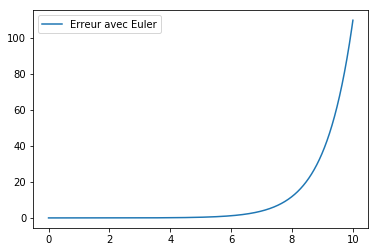

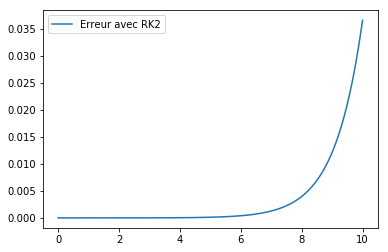

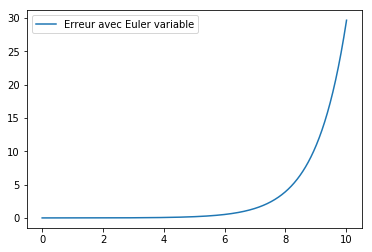

In [4]:
from numpy import *

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2) 
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)
    
# ligne 7 le boucle s'arrète à quand le dernier temps ajouté dépasse t_f
# ligne 8 on réalise un certain nombre de calculs avec la précision nécéssaire jusqu'à ce que l'on atteigne le temps d'échantillonage demandé dtmax
# ligne 12 tnew cf formule fémontrée précedemment
# ligne 13 on vérifie que dt n'est pas trop petit (probème de calcul dûe à la précision de l'ordinateur)
# ligne 15 Ni trop grand, on prend alors dtmax/2 par défaut
# ligne 18 lorsque ti dépasse dtmax, on revientlégerment en arrière pour bue déterminé la valeur de la fonction avec l'intervalle de temps dtmax
# ligne 19 on réalise alors le calcul au point qui est bien dtmax plus loin du précédent
# ligne 20/21 on ajoute les nouvelles valeurs

# L'utilisateur donne un temps déchantillonage de dtmax, ainsi, le programme doit afficher la valeur de la fonction tout les dtmax. 
#Néanmoins, ce programme lui permet de faire des calculs avec un intervalle de temps plus faible si nécéssaire (jusqu'a dtmin) 
#pour éviter au maximum les erreurs sans toutefois afficher un nombre enorme de points
#(par exemple si une zone a requis des pas de temps de 10**-14s, afficher un point toute les 10**-14s n'a pas de sens pour autant et 
#alourdirait inutilement l'affichage

def f1(X):
    return np.array(X[0])
def f2(X):
    return -np.array(X[0])
Lx=solve_ivp_euler_explicit_variable_step(f1, 0, [1], 10)[0]
Lz=np.transpose(solve_ivp_euler_explicit_variable_step(f1, 0, [1], 10)[1])
Lv=np.exp(Lx)

#écart à la fonction exponentielle pour Euler
plt.figure()
plt.plot(lx,np.abs(l1y-lz), label= 'Erreur avec Euler')
plt.legend()
#écart à la fonction exponentielle pour RK2
plt.figure()
plt.plot(lx,np.abs(l2y-lz),label='Erreur avec RK2')
plt.legend()
plt.show()
#écart avec Euler à pas variable
plt.figure()
plt.plot(Lx,np.abs(Lz-Lv),label='Erreur avec Euler variable')
plt.legend()
plt.show()

#On constate ici un temps de calcul bien supérieur à celui de RK2 avec cependant 
#une précision moindre

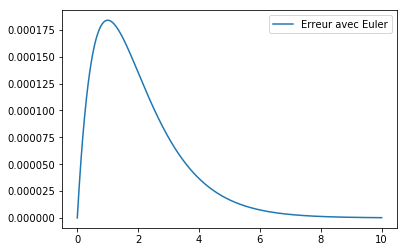

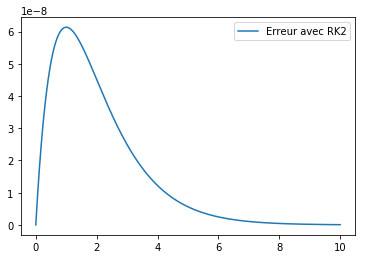

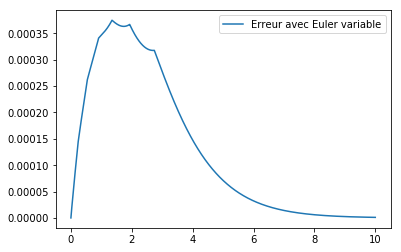

In [21]:
#On effectue maintenant un essai avec la fonction x --> exp(-x)
lx=np.array([i*0.001 for i in range (10000)])
# on prend 10 000 points sur l'intervalle [0,10]
lv=np.exp(-lx) #On connait la solution exacte
Lx=solve_ivp_euler_explicit_variable_step(f2, 0, [1], 10)[0]
Lz=np.transpose(solve_ivp_euler_explicit_variable_step(f2, 0, [1], 10)[1])
#écart à la fonction x --> exp(-x) pour Euler
plt.figure()
plt.plot(lx,np.abs(liste1y-lv), label= 'Erreur avec Euler')
plt.legend()
#écart à la fonction x --> exp(-x) pour RK2
plt.figure()
plt.plot(lx,np.abs(liste2y-lv),label='Erreur avec RK2')
plt.legend()
plt.show()
#écart à la fonction x --> exp(-x) avec Euler à pas variable
plt.figure()
plt.plot(Lx,np.abs(Lz-np.exp(-Lx)),label='Erreur avec Euler variable')
plt.legend()
plt.show()